In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("code_8411.csv")

In [28]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df = df.set_index("date")
df["open_5"] = df["open"].shift(5)
df["up_flg"] = df["close"] / df["open_5"]

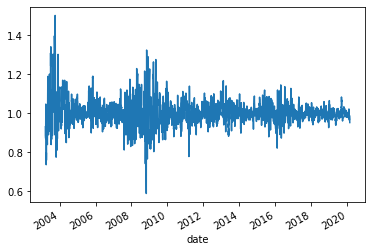

In [33]:
df["up_flg"].plot()

In [34]:
NIKKEI_PATH = "https://www.nikkei.com/nkd/company/history/dprice/"


In [35]:
from bs4 import BeautifulSoup
from urllib import request, error

In [37]:
scrape_path = NIKKEI_PATH + "?scode=8401"


In [38]:
page_html = request.urlopen(url=scrape_path, timeout=60)


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [39]:
scrape_path

'https://www.nikkei.com/nkd/company/history/dprice/?scode=8401'